# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file =   "../data/traffic-signs-data/train.p"
validation_file = "../data/traffic-signs-data/valid.p"
testing_file =    "../data/traffic-signs-data/test.p"
### Preprocessed file
training_pp_file = "../data/traffic-signs-data/train_pp.p"
### Preprocessed balanced file
training_pp_bal_file = "../data/traffic-signs-data/train_pp_bal.p"

with open(training_pp_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 452387
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

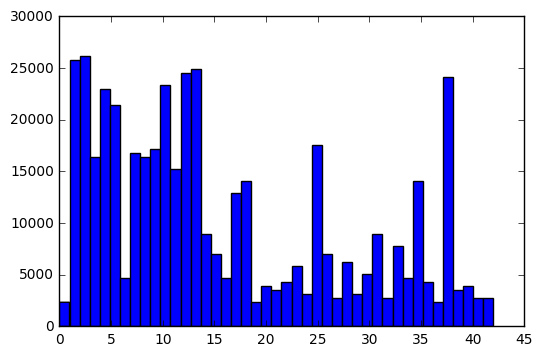

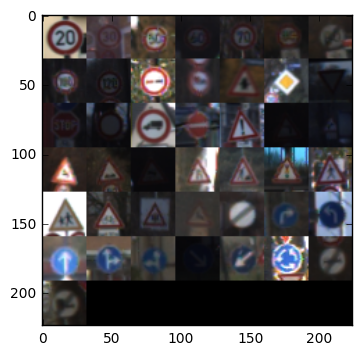

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import math
# Visualizations will be shown in the notebook.
%matplotlib inline

from collections import Counter

hist = Counter(y_train)

n, bins, patches = plt.hist(y_train, bins=n_classes)
plt.show()

### Show one of each type of image
cols = math.ceil(math.sqrt(n_classes))
rows = math.ceil(n_classes / cols)

w, h, d = image_shape

one_of_each_image = np.zeros((rows * w, cols * h, d), dtype=X_train.dtype)

for i in range(rows):
    for j in range(cols):
        idx = i * cols + j
        if idx >= n_classes:
            break
        x = i * w
        y = j * h
        
        one_of_each_image[x:x + w, y:y + h, :] = X_train[np.where(y_train==idx)[0][0]]
        
plt.imshow(one_of_each_image);

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2

def YUV_center(imgs):

    return np.array([cv2.cvtColor(i, cv2.COLOR_RGB2YUV) / 255 - 0.5 for i in imgs])

def YUV(imgs):

    return np.array([cv2.cvtColor(i, cv2.COLOR_RGB2YUV) / 255 for i in imgs])

def equalizeHist(imgs):

    ### Contrast Limited Adaptive Histogram Equalization
    ### http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html

    img_shape = imgs[0][:, :, 0].shape
    yuvs = [cv2.cvtColor(i, cv2.COLOR_RGB2YUV) for i in imgs]
    return np.array([np.dstack((cv2.equalizeHist(i[:, :, 0]) / 255, np.zeros(img_shape), np.zeros(img_shape))) for i in yuvs])

def CLAHE(imgs):

    ### Contrast Limited Adaptive Histogram Equalization
    ### http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html

    img_shape = imgs[0][:, :, 0].shape
    clahe = cv2.createCLAHE(tileGridSize=(4, 4))
    yuvs = [cv2.cvtColor(i, cv2.COLOR_RGB2YUV) for i in imgs]
    return np.array([np.dstack((clahe.apply(i[:, :, 0]) / 255, np.zeros(img_shape), np.zeros(img_shape))) for i in yuvs])

X_train = CLAHE(X_train)
X_valid = CLAHE(X_valid)
X_test = CLAHE(X_test)

### Model Architecture

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Building blocks of the various models I created

import tensorflow as tf

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

# Activation function to use
activation = tf.nn.relu

def linear(x, W, b):
    return tf.add(tf.matmul(x, W), b)

def conv2d(x, W, b, strides=1, padding='VALID'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    return tf.nn.bias_add(x, b)

def dropout(x, keep_prob):
    return tf.nn.dropout(x, keep_prob)

def maxpool2d(x, k=2, s=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, s, s, 1],
        padding='SAME')

def gen_keep_prob():
    return tf.placeholder(tf.float32, name="keep_prob")


In [6]:
### First attempt to solve the problem using a basic LeNet architecture
### this helped me get a feel for what I wanted to try

def LeNet(x):

    weights = {
        'conv1' : tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)),
        'conv2' : tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma)),
        'flat3' : tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma)),
        'flat4' : tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma)),
        'flat5' : tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    }
    biases = {
        'conv1' : tf.Variable(tf.zeros(6)),
        'conv2' : tf.Variable(tf.zeros(16)),
        'flat3' : tf.Variable(tf.zeros(120)),
        'flat4' : tf.Variable(tf.zeros(84)),
        'flat5' : tf.Variable(tf.zeros(43))
    }

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = conv2d(x, weights['conv1'], biases['conv1'])

    # Activation
    conv1 = activation(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1, 2)

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = conv2d(conv1, weights['conv2'], biases['conv2'])

    # Activation.
    conv2 = activation(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2, 2)

    # Flatten. Input = 5x5x16. Output = 400.
    flat3 = tf.reshape(conv2, [-1, weights['flat3'].get_shape().as_list()[0]])

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    flat3 = linear(flat3, weights['flat3'], biases['flat3'])

    # Activation.
    flat3 = activation(flat3)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    flat4 = linear(flat3, weights['flat4'], biases['flat4'])

    # Activation.
    flat4 = activation(flat4)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = linear(flat4, weights['flat5'], biases['flat5'])

    return logits


In [7]:
### This is based on the LeNet architecture but uses 3 convolution layers

def LeNet3(x):

    weights = {
        'conv1' : tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)),
        'conv2' : tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 16), mean = mu, stddev = sigma)),
        'conv3' : tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 32), mean = mu, stddev = sigma)),
        'flat4' : tf.Variable(tf.truncated_normal(shape=(800, 200), mean = mu, stddev = sigma)),
        'flat5' : tf.Variable(tf.truncated_normal(shape=(200, 84), mean = mu, stddev = sigma)),
        'flat6' : tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    }
    biases = {
        'conv1' : tf.Variable(tf.zeros(6)),
        'conv2' : tf.Variable(tf.zeros(16)),
        'conv3' : tf.Variable(tf.zeros(32)),
        'flat4' : tf.Variable(tf.zeros(200)),
        'flat5' : tf.Variable(tf.zeros(84)),
        'flat6' : tf.Variable(tf.zeros(43))
    }

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = conv2d(x, weights['conv1'], biases['conv1'])

    # Activation
    conv1 = activation(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1, 2)

    # Layer 2: Convolutional. Output = 12x12x16.
    conv2 = conv2d(conv1, weights['conv2'], biases['conv2'])

    # Activation.
    conv2 = activation(conv2)

    # Layer 3: Convolutional. Output = 10x10x32.
    conv3 = conv2d(conv2, weights['conv3'], biases['conv3'])

    # Activation.
    conv3 = activation(conv3)

    # Pooling. Input = 10x10x32. Output = 5x5x32.
    conv3 = maxpool2d(conv3, 2)

    # Flatten. Input = 5x5x32. Output = 800.
    flat4 = tf.reshape(conv3, [-1, weights['flat4'].get_shape().as_list()[0]])

    # Layer 4: Fully Connected. Input = 800. Output = 200.
    flat4 = linear(flat4, weights['flat4'], biases['flat4'])

    # Activation.
    flat4 = activation(flat4)

    # Layer 5: Fully Connected. Input = 200. Output = 84.
    flat5 = linear(flat4, weights['flat5'], biases['flat5'])

    # Activation.
    flat5 = activation(flat5)

    # Layer 6: Fully Connected. Input = 84. Output = 43.
    logits = linear(flat5, weights['flat6'], biases['flat6'])

    return logits


In [8]:
### Same as LeNet3, but using dropout on the fully connected layers

def LeNet3_dropout_fc(x, keep_prob):

    weights = {
        'conv1' : tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)),
        'conv2' : tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 16), mean = mu, stddev = sigma)),
        'conv3' : tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 32), mean = mu, stddev = sigma)),
        'flat4' : tf.Variable(tf.truncated_normal(shape=(800, 200), mean = mu, stddev = sigma)),
        'flat5' : tf.Variable(tf.truncated_normal(shape=(200, 84), mean = mu, stddev = sigma)),
        'flat6' : tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    }
    biases = {
        'conv1' : tf.Variable(tf.zeros(6)),
        'conv2' : tf.Variable(tf.zeros(16)),
        'conv3' : tf.Variable(tf.zeros(32)),
        'flat4' : tf.Variable(tf.zeros(200)),
        'flat5' : tf.Variable(tf.zeros(84)),
        'flat6' : tf.Variable(tf.zeros(43))
    }

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = conv2d(x, weights['conv1'], biases['conv1'])

    # Activation
    conv1 = activation(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1, 2)

    # Layer 2: Convolutional. Output = 12x12x16.
    conv2 = conv2d(conv1, weights['conv2'], biases['conv2'])

    # Activation.
    conv2 = activation(conv2)

    # Layer 3: Convolutional. Output = 10x10x32.
    conv3 = conv2d(conv2, weights['conv3'], biases['conv3'])

    # Activation.
    conv3 = activation(conv3)

    # Pooling. Input = 10x10x32. Output = 5x5x32.
    conv3 = maxpool2d(conv3, 2)

    # Flatten. Input = 5x5x32. Output = 800.
    flat4 = tf.reshape(conv3, [-1, weights['flat4'].get_shape().as_list()[0]])

    # Layer 4: Fully Connected. Input = 800. Output = 200.
    flat4 = linear(flat4, weights['flat4'], biases['flat4'])

    # Activation.
    flat4 = activation(flat4)

    # Dropout
    flat4 = dropout(flat4, keep_prob)

    # Layer 5: Fully Connected. Input = 200. Output = 84.
    flat5 = linear(flat4, weights['flat5'], biases['flat5'])

    # Activation.
    flat5 = activation(flat5)

    # Dropout
    flat5 = dropout(flat5, keep_prob)

    # Layer 6: Fully Connected. Input = 84. Output = 43.
    logits = linear(flat5, weights['flat6'], biases['flat6'])

    return logits


In [9]:
### This is a Multi Scale version of the LeNet architecture inspired by the following paper:
### http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf
###
### TL;DR The outputs from all convolution layers are fed into the fully connected layer

def Multi_Scale_LeNet(x):

    weights = {
        'conv1' : tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)),
        'conv2' : tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma)),
        'flat3' : tf.Variable(tf.truncated_normal(shape=(1576, 400), mean = mu, stddev = sigma)),
        'flat4' : tf.Variable(tf.truncated_normal(shape=(400, 100), mean = mu, stddev = sigma)),
        'flat5' : tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    }
    biases = {
        'conv1' : tf.Variable(tf.zeros(6)),
        'conv2' : tf.Variable(tf.zeros(16)),
        'flat3' : tf.Variable(tf.zeros(400)),
        'flat4' : tf.Variable(tf.zeros(100)),
        'flat5' : tf.Variable(tf.zeros(43))
    }

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = conv2d(x, weights['conv1'], biases['conv1'])

    # Activation
    conv1 = activation(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1, 2)

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = conv2d(conv1, weights['conv2'], biases['conv2'])

    # Activation.
    conv2 = activation(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2, 2)

    # Flatten. Input = 14x14x6 + 5x5x16. Output = 1576.
    flat_conv1 = tf.reshape(conv1, [-1, 14*14*6])
    flat_conv2 = tf.reshape(conv2, [-1, 5*5*16])
    flat3 = tf.concat(1, [flat_conv1, flat_conv2])

    # Layer 3: Fully Connected. Input = 1576. Output = 400.
    flat3 = linear(flat3, weights['flat3'], biases['flat3'])

    # Activation.
    flat3 = activation(flat3)

    # Layer 4: Fully Connected. Input = 400. Output = 100.
    flat4 = linear(flat3, weights['flat4'], biases['flat4'])

    # Activation.
    flat4 = activation(flat4)

    # Layer 5: Fully Connected. Input = 100. Output = 43.
    logits = linear(flat4, weights['flat5'], biases['flat5'])

    return logits


In [10]:
### This is a Multi Scale version of my 3 convolution layer LeNet
### It uses dropout on the fully connected layers

def Multi_Scale_LeNet3_pooling_dropout_fc(x, keep_prob):

    weights = {
        'conv1' : tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)),
        'conv2' : tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 16), mean = mu, stddev = sigma)),
        'conv3' : tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 32), mean = mu, stddev = sigma)),
        'flat4' : tf.Variable(tf.truncated_normal(shape=(2552, 800), mean = mu, stddev = sigma)),
        'flat5' : tf.Variable(tf.truncated_normal(shape=(800, 200), mean = mu, stddev = sigma)),
        'flat6' : tf.Variable(tf.truncated_normal(shape=(200, 84), mean = mu, stddev = sigma)),
        'flat7' : tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    }
    biases = {
        'conv1' : tf.Variable(tf.zeros(6)),
        'conv2' : tf.Variable(tf.zeros(16)),
        'conv3' : tf.Variable(tf.zeros(32)),
        'flat4' : tf.Variable(tf.zeros(800)),
        'flat5' : tf.Variable(tf.zeros(200)),
        'flat6' : tf.Variable(tf.zeros(84)),
        'flat7' : tf.Variable(tf.zeros(43))
    }

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = conv2d(x, weights['conv1'], biases['conv1'])

    # Activation
    conv1 = activation(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1, 2)

    # Layer 2: Convolutional. Output = 12x12x16.
    conv2 = conv2d(conv1, weights['conv2'], biases['conv2'])

    # Activation.
    conv2 = activation(conv2)

    # Layer 3: Convolutional. Output = 10x10x32.
    conv3 = conv2d(conv2, weights['conv3'], biases['conv3'])

    # Activation.
    conv3 = activation(conv3)

    # Pooling. Input = 10x10x32. Output = 5x5x32.
    conv3 = maxpool2d(conv3, 2)

    # Flatten. Input = 14x14x6 + 6x6x16 + 5x5x32. Output = 2552.
    flat_conv1 = tf.reshape(conv1, [-1, 14*14*6])
    flat_conv2 = tf.reshape(maxpool2d(conv2, 2), [-1, 6*6*16])
    flat_conv3 = tf.reshape(conv3, [-1, 5*5*32])
    flat3 = tf.concat(1, [flat_conv1, flat_conv2, flat_conv3])

    # Layer 4: Full Connected. Input 2552. Output 800.
    flat4 = linear(flat3, weights['flat4'], biases['flat4'])

        # Activation.
    flat4 = activation(flat4)

    # Dropout
    flat4 = dropout(flat4, keep_prob)

    # Layer 5: Fully Connected. Input = 800. Output = 200.
    flat5 = linear(flat4, weights['flat5'], biases['flat5'])

    # Activation.
    flat5 = activation(flat5)

    # Dropout
    flat5 = dropout(flat5, keep_prob)

    # Layer 6: Fully Connected. Input = 200. Output = 84.
    flat6 = linear(flat5, weights['flat6'], biases['flat6'])

    # Activation.
    flat6 = activation(flat6)

    # Dropout
    flat6 = dropout(flat6, keep_prob)

    # Layer 7: Fully Connected. Input = 84. Output = 43.
    logits = linear(flat6, weights['flat7'], biases['flat7'])

    return logits


In [11]:
### My attempt at an Inception architecture based on Google's Inception layer (pre v3, I think)

def Inception_dropout_fc(x, keep_prob):

    weights = {
        'conv1' : tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)),

        'conv2_a_1_1' : tf.Variable(tf.truncated_normal(shape=(1, 1, 6, 8), mean = mu, stddev = sigma)),
        'conv2_b_1_1' : tf.Variable(tf.truncated_normal(shape=(1, 1, 6, 8), mean = mu, stddev = sigma)),
        'conv2_b_3_3' : tf.Variable(tf.truncated_normal(shape=(3, 3, 8, 32), mean = mu, stddev = sigma)),
        'conv2_c_1_1' : tf.Variable(tf.truncated_normal(shape=(1, 1, 6, 8), mean = mu, stddev = sigma)),
        'conv2_c_5_5' : tf.Variable(tf.truncated_normal(shape=(5, 5, 8, 16), mean = mu, stddev = sigma)),
        'conv2_d_1_1' : tf.Variable(tf.truncated_normal(shape=(1, 1, 6, 8), mean = mu, stddev = sigma)),

        'conv3_a_1_1' : tf.Variable(tf.truncated_normal(shape=(1, 1, 64, 80), mean = mu, stddev = sigma)),
        'conv3_b_1_1' : tf.Variable(tf.truncated_normal(shape=(1, 1, 64, 80), mean = mu, stddev = sigma)),
        'conv3_b_3_3' : tf.Variable(tf.truncated_normal(shape=(3, 3, 80, 232), mean = mu, stddev = sigma)),
        'conv3_c_1_1' : tf.Variable(tf.truncated_normal(shape=(1, 1, 64, 80), mean = mu, stddev = sigma)),
        'conv3_c_5_5' : tf.Variable(tf.truncated_normal(shape=(5, 5, 80, 120), mean = mu, stddev = sigma)),
        'conv3_d_1_1' : tf.Variable(tf.truncated_normal(shape=(1, 1, 64, 80), mean = mu, stddev = sigma)),

        'full_conn1' : tf.Variable(tf.truncated_normal(shape=(8192, 1420), mean = mu, stddev = sigma)),
        'full_conn2' : tf.Variable(tf.truncated_normal(shape=(1420, 250), mean = mu, stddev = sigma)),
        'full_conn3' : tf.Variable(tf.truncated_normal(shape=(250, 43), mean = mu, stddev = sigma))
    }

    biases = {
        'conv1' : tf.Variable(tf.zeros(6)),
        'conv2_a_1_1' : tf.Variable(tf.zeros(8)),
        'conv2_b_1_1' : tf.Variable(tf.zeros(8)),
        'conv2_b_3_3' : tf.Variable(tf.zeros(32)),
        'conv2_c_1_1' : tf.Variable(tf.zeros(8)),
        'conv2_c_5_5' : tf.Variable(tf.zeros(16)),
        'conv2_d_1_1' : tf.Variable(tf.zeros(8)),
        'conv3_a_1_1' : tf.Variable(tf.zeros(80)),
        'conv3_b_1_1' : tf.Variable(tf.zeros(80)),
        'conv3_b_3_3' : tf.Variable(tf.zeros(232)),
        'conv3_c_1_1' : tf.Variable(tf.zeros(80)),
        'conv3_c_5_5' : tf.Variable(tf.zeros(120)),
        'conv3_d_1_1' : tf.Variable(tf.zeros(80)),
        'full_conn1' : tf.Variable(tf.zeros(1420)),
        'full_conn2' : tf.Variable(tf.zeros(250)),
        'full_conn3' : tf.Variable(tf.zeros(43))
    }

    # Layer 1: Normal Convolution. Input = 32x32x3. Output = 32x32x6
    conv1 = conv2d(x, weights['conv1'], biases['conv1'], padding='SAME')

    # Activation
    conv1 = activation(conv1)

    # Pooling. Input = 32x32x6. Output 16x16x6.
    conv1 = maxpool2d(conv1, 2)


    # Layer 2: Inception. Input 16x16x6. Output = 16x16x64
    conv2_a = conv2d(conv1, weights['conv2_a_1_1'], biases['conv2_a_1_1'], padding='SAME')
    conv2_b = conv2d(conv1, weights['conv2_b_1_1'], biases['conv2_b_1_1'], padding='SAME')
    conv2_b = conv2d(conv2_b, weights['conv2_b_3_3'], biases['conv2_b_3_3'], padding='SAME')
    conv2_c = conv2d(conv1, weights['conv2_c_1_1'], biases['conv2_c_1_1'], padding='SAME')
    conv2_c = conv2d(conv2_c, weights['conv2_c_5_5'], biases['conv2_c_5_5'], padding='SAME')
    conv2_d = maxpool2d(conv1, 3, 1)
    conv2_d = conv2d(conv2_d, weights['conv2_d_1_1'], biases['conv2_d_1_1'], padding='SAME')

    conv2 = tf.concat(3, [conv2_a, conv2_b, conv2_c, conv2_d])

    # Activation
    conv2 = activation(conv2)

    # Pooling. Input = 16x16x64. Output 8x8x64.
    conv2 = maxpool2d(conv2, 2)


    # Layer 3: Inception. Input 8x8x64. Output = 8x8x512
    conv3_a = conv2d(conv2, weights['conv3_a_1_1'], biases['conv3_a_1_1'], padding='SAME')
    conv3_b = conv2d(conv2, weights['conv3_b_1_1'], biases['conv3_b_1_1'], padding='SAME')
    conv3_b = conv2d(conv3_b, weights['conv3_b_3_3'], biases['conv3_b_3_3'], padding='SAME')
    conv3_c = conv2d(conv2, weights['conv3_c_1_1'], biases['conv3_c_1_1'], padding='SAME')
    conv3_c = conv2d(conv3_c, weights['conv3_c_5_5'], biases['conv3_c_5_5'], padding='SAME')
    conv3_d = maxpool2d(conv2, 3, 1)
    conv3_d = conv2d(conv3_d, weights['conv3_d_1_1'], biases['conv3_d_1_1'], padding='SAME')

    conv3 = tf.concat(3, [conv3_a, conv3_b, conv3_c, conv3_d])

    # Activation
    conv3 = activation(conv3)

    # Pooling. Input = 8x8x512. Output = 4x4x512
    conv3 = maxpool2d(conv3, 2)


    # Layer 4: Fully Connected. Input 8192. Output 1420
    flat = tf.reshape(conv3, [-1, 4*4*512])
    full1 = linear(flat, weights['full_conn1'], biases['full_conn1'])

    # Activation
    full1 = activation(full1)

        # Dropout
    full1 = dropout(full1, keep_prob)

    # Layer 5: Fully Connected. Input 1420. Output 250
    full2 = linear(full1, weights['full_conn2'], biases['full_conn2'])

    # Activation
    full2 = activation(full2)

    # Dropout
    full2 = dropout(full2, keep_prob)

    # Layer 6: Fully Connected. Input 250. Output 43
    logits = linear(full2, weights['full_conn3'], biases['full_conn3'])

    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

import math
import sys

from sklearn.utils import shuffle
from tqdm import tqdm


In [13]:
### Evaluate function to determine the accuracy of the model

def evaluate(X_data, y_data, placeholders, batch_size, accuracy_operation):
    x, y, keep_prob = placeholders
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [14]:
def train_network(logits, model_file, data, placeholders, rate=0.001, epochs=100, batch_size=128, keep_prob_val=1.0, stop_early=False):

    X_train, y_train, X_valid, y_valid = data
    x, y, keep_prob = placeholders

    n_classes = len(set(y_train))

    one_hot_y = tf.one_hot(y, n_classes)

    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)

    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()

    n_examples = len(X_train)

    stop_acc_val = 0.99
    stop_acc_cnt = 0
    
    with open('../results/{}.accuracy'.format(model_file), mode='w') as f:
        f.write('----------------------\n')
        f.write('      Parameters\n')
        f.write('----------------------\n')
        f.write('Learn Rate: {}\n'.format(rate))
        f.write('Epochs:     {}\n'.format(epochs))
        f.write('Batch Size: {}\n'.format(batch_size))
        f.write('Keep Prob:  {}\n'.format(keep_prob_val))
        f.write('-----------------------\n')

    with tf.Session() as sess:
        if 'global_variables_initializer' in dir(tf):
            # TensorFlow > 0.11
            sess.run(tf.global_variables_initializer())
        else:
            sess.run(tf.initialize_all_variables())

        batch_count = int(math.ceil(n_examples/batch_size))

        print("Training {}...".format(model_file))
        print()
        sys.stdout.flush()

        epoch_accuracy = []

        for i in range(epochs):
            local_X_train, local_y_train = shuffle(X_train, y_train)

            # Progress bar
            batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(i+1, epochs), unit='batches')

            for batch_i in batches_pbar:
                offset = batch_i * batch_size
                end = offset + batch_size
                batch_x, batch_y = local_X_train[offset:end], local_y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_prob_val})

            validation_accuracy = evaluate(X_valid, y_valid, placeholders, batch_size, accuracy_operation)
            epoch_accuracy.append(validation_accuracy)
            
            with open('../results/{}.accuracy'.format(model_file), mode='a') as f:
                f.write('{:.4f}\n'.format(validation_accuracy))
                
            if validation_accuracy > stop_acc_val:
                stop_acc_cnt += 1
                if stop_acc_cnt >= 5:
                    epochs = epochs + 1
                    break

        ### Save model and epoch accuracy information
        saver.save(sess, '../results/{}'.format(model_file))
        
        print("Accuracy: {:.4f} -> {:.4f}, MAX: {:.4f}".format(epoch_accuracy[0], epoch_accuracy[-1], max(epoch_accuracy)))
        print("Model saved: {}".format(model_file))


In [15]:
### After many, many tests, I decided to go with my modified LeNet architecture
### using 3 convolution layers and dropout on the fully connected layer

x = tf.placeholder(tf.float32, (None,) + image_shape)
y = tf.placeholder(tf.int32, (None))

keep_prob = tf.placeholder(tf.float32)

data = (X_train, y_train, X_valid, y_valid)
placeholders = (x, y, keep_prob)

logits = LeNet3_dropout_fc(x, keep_prob)

model_file = "LeNet3_dropout_fc_pp_CLAHE_e400_k0_5"

train_network(logits, model_file, data, placeholders, rate=0.0001, epochs=200, keep_prob_val=0.5, stop_early=True)


Training LeNet3_dropout_fc_pp_CLAHE_e400_k0_5...



Epoch 200/200: 100%|██████████| 3535/3535 [00:31<00:00, 113.62batches/s]


Accuracy: 0.7565 -> 0.9832, MAX: 0.9846
Model saved: LeNet3_dropout_fc_pp_CLAHE_e400_k0_5


In [16]:
one_hot_y = tf.one_hot(y, n_classes)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

with tf.Session() as sess:

    saver.restore(sess, '../results/{}'.format(model_file))
    
    test_accuracy = evaluate(X_test, y_test, placeholders, 128, accuracy_operation)
    print("Test accuracy: {:.4f}".format(test_accuracy))

Test accuracy: 0.9722


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import math
import matplotlib.image as mpimg
import numpy as np

def read_sign_types():
    
    with open('signnames.csv') as f:
        signs = [l.split(',')[-1] for l in f.read().split('\n')[1:-1]]
        
    return signs


def read_new_images(filenames):
    
    X_new = np.zeros((len(filenames), 32, 32, 3), dtype='uint8')

    cols = math.ceil(math.sqrt(len(filenames)))
    rows = math.ceil(len(filenames) / cols)

    w, h, d = (32, 32, 3)

    collage = np.zeros((cols * w, rows * h, d), dtype='uint8')

    col = row = 0

    for i, filename in enumerate(filenames):
        img = mpimg.imread(filename)
        X_new[i, :, :, :] = img
    
        x_pos = col * w
        y_pos = row * h
        collage[x_pos:x_pos + w, y_pos:y_pos + h, :] = img
    
        col += 1
        if col >= cols:
            col = 0
            row += 1
            
    return (X_new, collage)

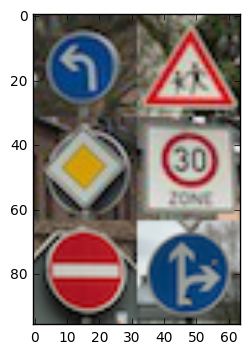

In [27]:
import glob
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

known_sign_imgs = glob.glob('known/*.jpg')

X_known, collage = read_new_images(known_sign_imgs)

y_known = np.array([34, 12, 17, 28, 1, 36])

plt.imshow(collage);

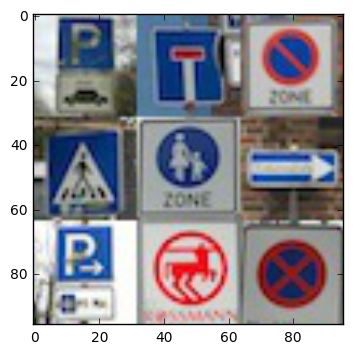

In [28]:
unknown_sign_imgs = glob.glob('unknown/*.jpg')

X_unknown, collage = read_new_images(unknown_sign_imgs)

plt.imshow(collage);

### Predict the Sign Type for Each Image

In [29]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def visualize_predictions(X):
    saver = tf.train.Saver()

    signs = read_sign_types()

    X_mod = CLAHE(X)
    
    with tf.Session() as sess:
    
        saver.restore(sess, '../results/{}'.format(model_file))
    
        softmax_out = tf.nn.softmax(logits)
        top_k = tf.nn.top_k(softmax_out, 5)
    
        output = sess.run(top_k, feed_dict={x: X_mod, keep_prob: 1.0})
    
        for i, idx in enumerate(output.indices):
            idx = idx[0]
            plt.figure()
            plt.title(signs[idx])
            plt.imshow(X[i]);

        return {'predictions': [i[0] for i in output.indices], 'softmax': output}

## Test with KNOWN signs ##

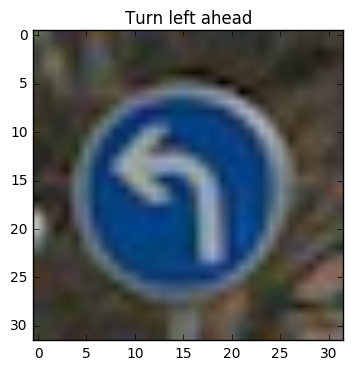

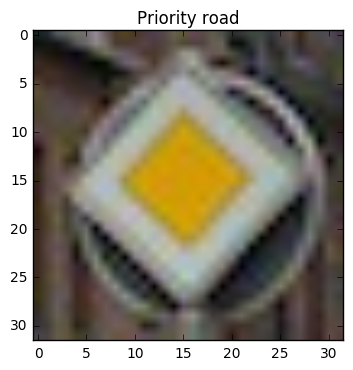

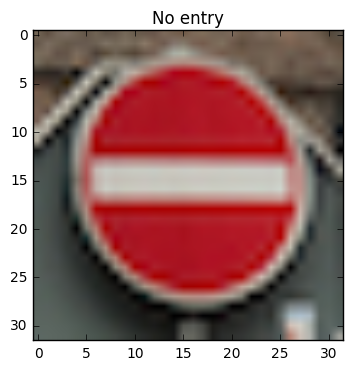

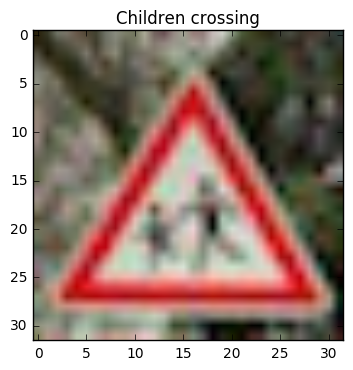

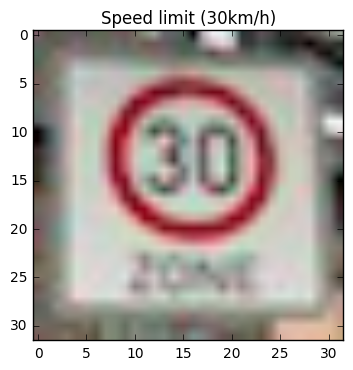

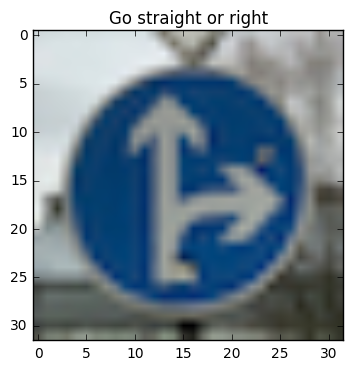

In [30]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

known_result = visualize_predictions(X_known)
known_indices = known_result['predictions']



## Test with UNKNOWN sign types ##

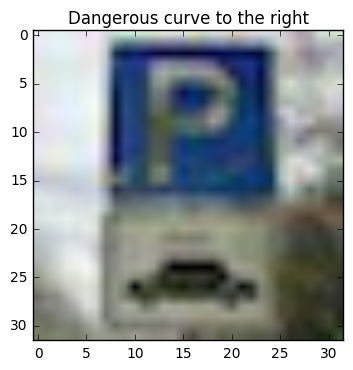

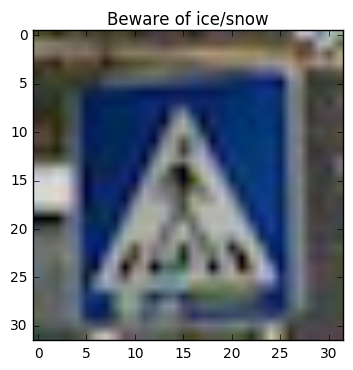

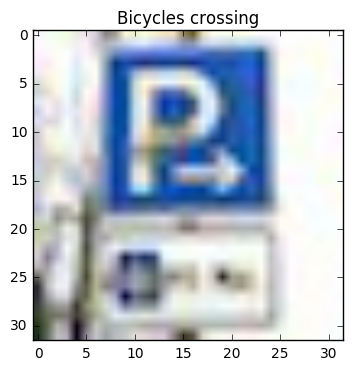

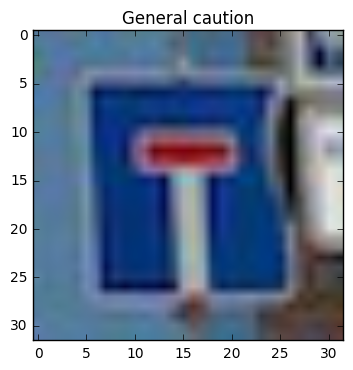

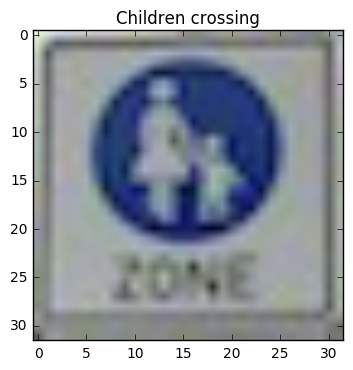

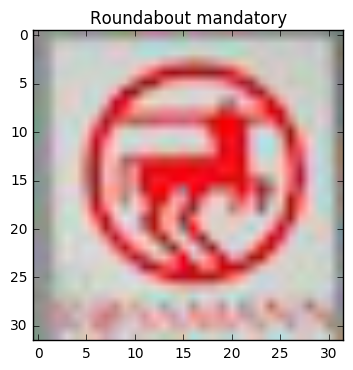

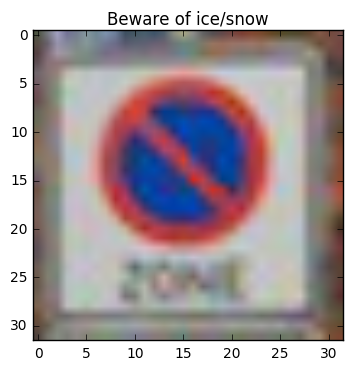

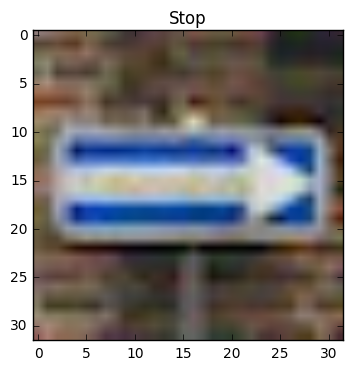

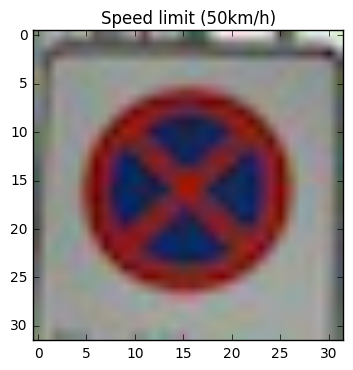

In [31]:
unknown_result = visualize_predictions(X_unknown)


### Analyze Performance

In [33]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

total_correct = sum(a == b and 1 or 0 for a, b in zip(known_indices, y_known))

accuracy = total_correct / len(y_known)

print("Accuracy of unseen new images: {:.4f}".format(accuracy))

Accuracy of unseen new images: 1.0000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

## Softmax certainty for KNOWN signs ##

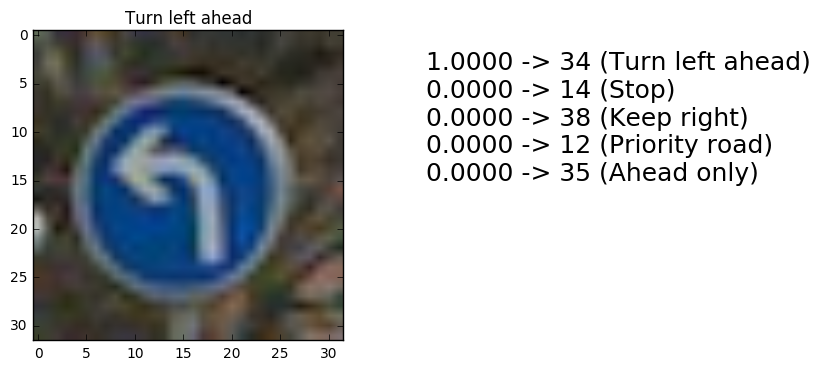

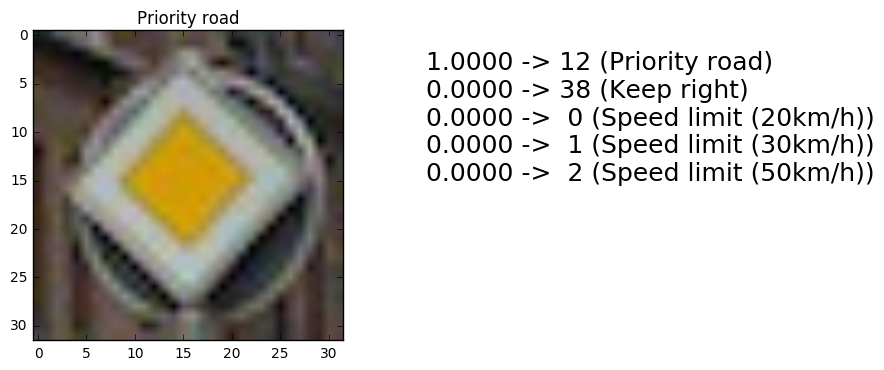

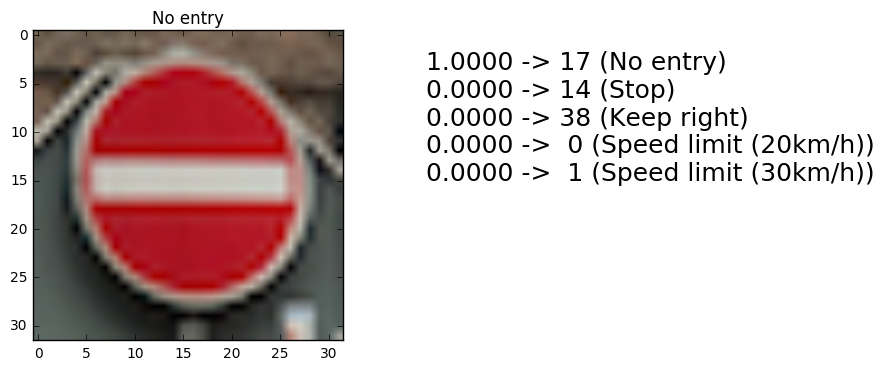

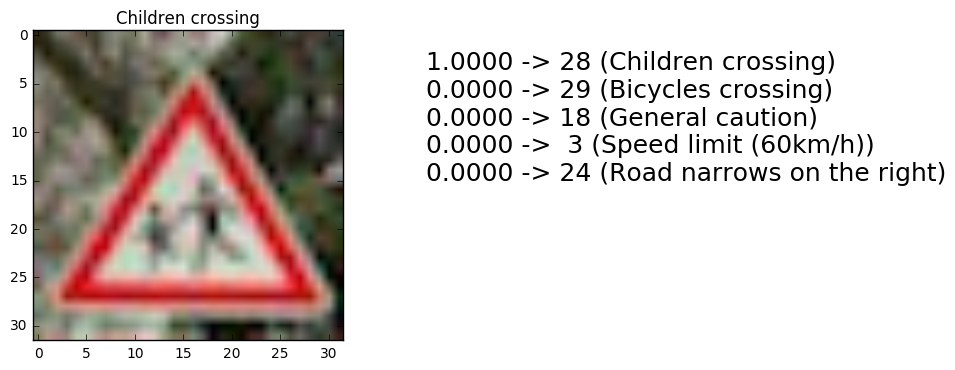

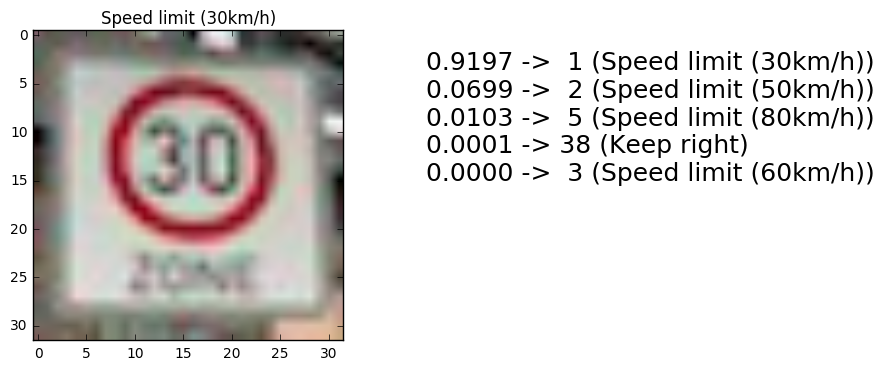

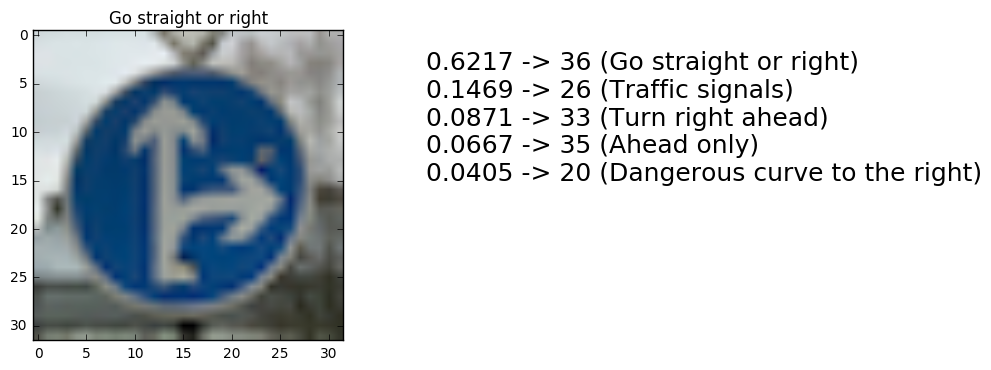

In [34]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

signs = read_sign_types()

for i in range(y_known.shape[0]):
   
    printable = ["{:.4f} -> {:2} ({})".format(v, i, signs[i]) for i, v in zip(known_result['softmax'].indices[i], known_result['softmax'].values[i])]

    plt.figure()
    plt.title(signs[y_known[i]])
    plt.text(40, 15, '\n'.join(printable), fontsize=18)
    plt.imshow(X_known[i]);


## Softmax certainty for UNKNOWN signs ##

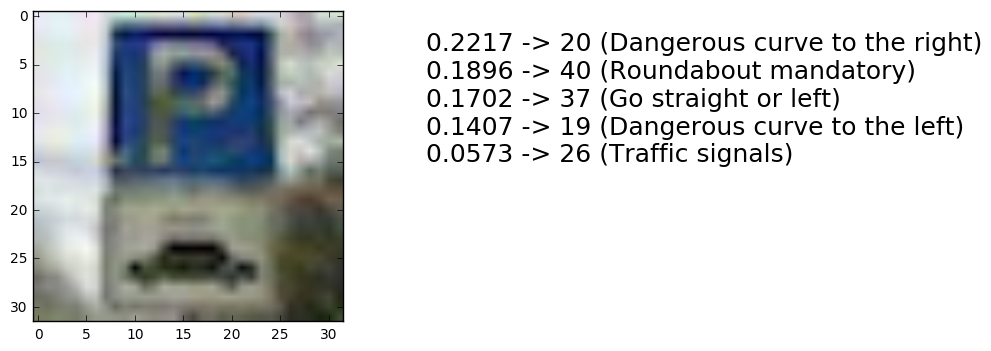

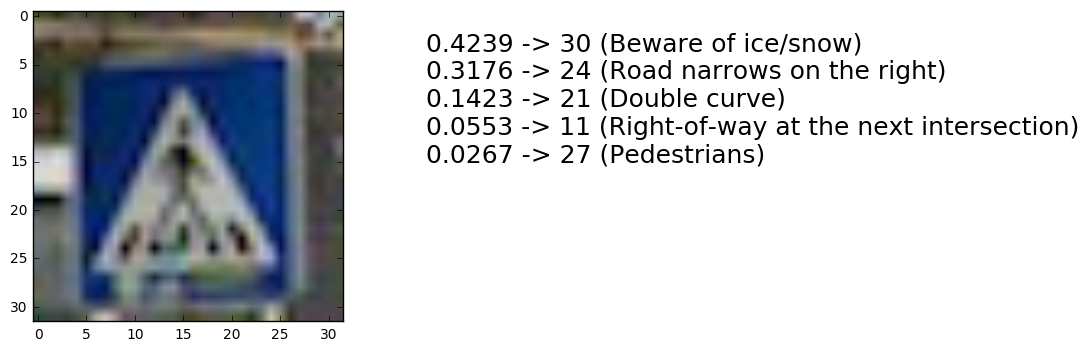

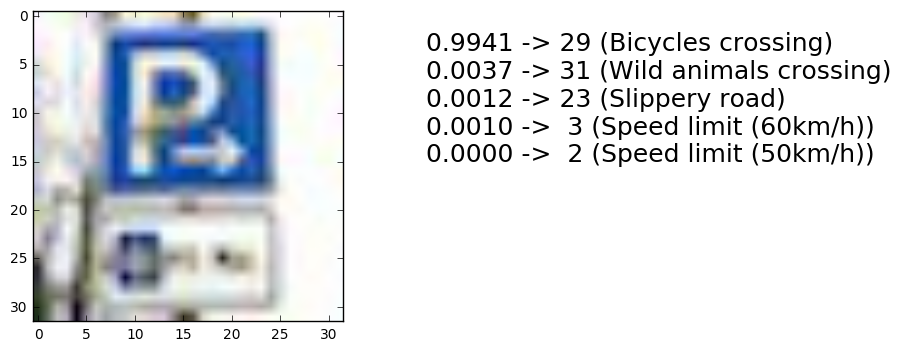

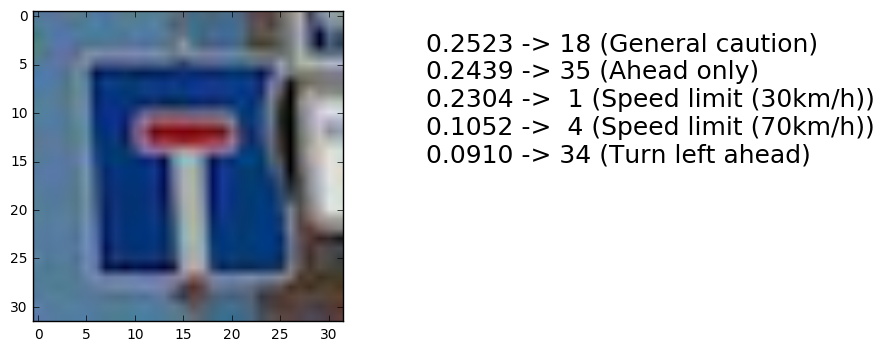

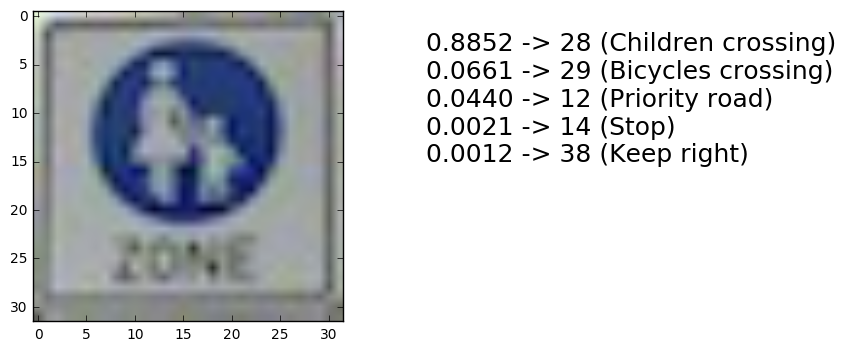

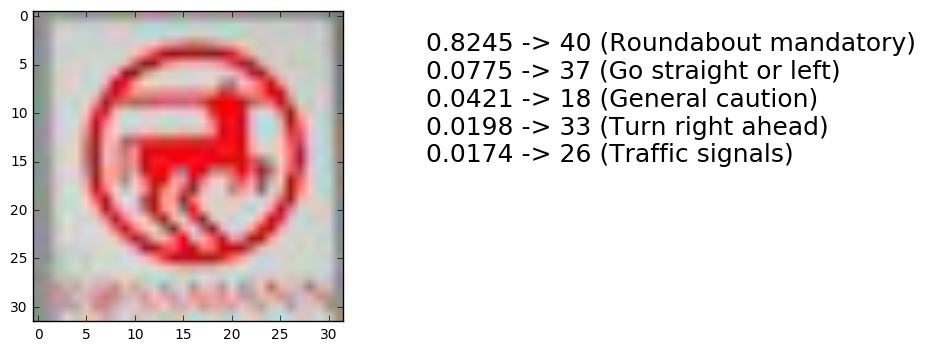

In [35]:
for i in range(y_known.shape[0]):
   
    printable = ["{:.4f} -> {:2} ({})".format(v, i, signs[i]) for i, v in zip(unknown_result['softmax'].indices[i], unknown_result['softmax'].values[i])]

    plt.figure()
    plt.text(40, 15, '\n'.join(printable), fontsize=18)
    plt.imshow(X_unknown[i]);

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 